1️⃣ Can we use Bagging for regression problems?

👉 Yes.
Bagging (Bootstrap Aggregating) can be applied to both classification and regression problems.

In regression, multiple models (like Decision Trees) are trained on bootstrapped datasets.

The final prediction is the average of all model predictions.
🔹 Example:
If 3 models predict values [10, 12, 14] → Final output = (10 + 12 + 14) / 3 = 12

2️⃣ Difference between multiple model training and single model training
Aspect	Single Model Training	Multiple Model (Ensemble) Training
Definition	Train one model on the entire data	Train several models and combine results
Goal	Learn one best pattern	Combine strengths of many models
Stability	May vary with data	More stable and robust
Variance	Higher	Lower
Example	One Decision Tree	Random Forest (many trees)
3️⃣ Explain the concept of feature randomness in Random Forest

In Random Forest, when a node splits:

Instead of using all features, only a random subset of features is considered.

This randomness ensures diversity among trees and prevents them from being identical.

✅ Benefit: Reduces correlation among trees → better generalization and less overfitting.

4️⃣ What is OOB (Out-of-Bag) Score

When building each tree:

The tree is trained on a bootstrap sample (random data with replacement).

About 37% of data is not included in this sample → called Out-of-Bag data.

These OOB samples are used to test that tree, giving the OOB Score (like built-in cross-validation).

✅ Purpose: Provides an unbiased accuracy estimate without a separate test set.

5️⃣ How can you measure the importance of features in a Random Forest model

Two main methods:

Mean Decrease in Impurity (Gini Importance):

Measures how much each feature reduces impurity (like Gini or Entropy) across all splits.

Permutation Importance:

Randomly shuffle one feature and observe how much model accuracy drops.

Bigger drop → more important feature.

6️⃣ Explain the working principle of a Bagging Classifier

Bagging = Bootstrap Sampling + Aggregation

Steps:

Create many bootstrap samples from training data.

Train a base model (e.g., Decision Tree) on each sample.

For classification: Combine predictions using majority voting.

🔹 Example:
Models predict [Cat, Dog, Cat, Cat] → Final = Cat (majority vote)

7️⃣ How do you evaluate a Bagging Classifier’s performance

You can evaluate it using:

Accuracy, Precision, Recall, F1-score, or ROC-AUC

OOB Score for internal validation

Cross-validation or test dataset for external validation

8️⃣ How does a Bagging Regressor work

Each regressor is trained on different bootstrap samples.

The final output is the average of all predictions.

🔹 Example:
Models predict [50, 52, 54] → Final = (50 + 52 + 54)/3 = 52

✅ Goal: Reduce variance and improve stability of predictions.

9️⃣ Main advantage of ensemble techniques

Higher accuracy than single models

Reduced overfitting

Better generalization on unseen data

Stable performance even if one model performs poorly

🔟 Main challenge of ensemble methods

High computational cost (training many models)

Less interpretability (harder to explain results)

More memory and time required

11️⃣ Key idea behind ensemble techniques

“A group of weak learners combine to form a strong learner.”

Each model captures different aspects of the data; combining them reduces errors and improves accuracy.

12️⃣ What is a Random Forest Classifier

A collection of Decision Trees trained using bagging and feature randomness.

Each tree votes for a class → majority vote decides the final output.

✅ Key points:

Uses bootstrapped samples

Uses random subsets of features

More robust and accurate than a single Decision Tree

13️⃣ Main types of ensemble techniques
Type	Examples	Purpose
Bagging	Random Forest, Bagging Regressor	Reduce variance
Boosting	AdaBoost, Gradient Boosting, XGBoost	Reduce bias
Stacking	Stacked Generalization	Combine predictions of multiple models
14️⃣ What is ensemble learning in machine learning

Ensemble learning is a method where multiple models (base learners) are combined to produce a stronger overall model.

✅ It improves prediction accuracy, stability, and robustness.

15️⃣ When should we avoid using ensemble methods

Avoid when:

You need a simple and interpretable model (e.g., healthcare, legal).

The dataset is very small (ensemble may overfit).

You have limited computational power (since ensembles are resource-heavy).

16️⃣ How does Bagging help in reducing overfitting

By training models on different bootstrap samples, Bagging introduces diversity.

Averaging predictions reduces random fluctuations (noise).
✅ This smooths out overfitting from individual high-variance models like Decision Trees.

17️⃣ Why is Random Forest better than a single Decision Tree
Aspect	Decision Tree	Random Forest
Overfitting	Prone to overfit	Less likely (averaging)
Variance	High	Low
Stability	Sensitive to data changes	More stable
Accuracy	Moderate	Higher
Interpretability	Easy	Harder

✅ Random Forest combines many trees → balances bias and variance → more reliable.

18️⃣ Role of bootstrap sampling in Bagging

Bootstrap sampling = Random sampling with replacement.

Each model trains on a different subset of data.
✅ This increases model diversity → reduces correlation → improves generalization.

19️⃣ Real-world applications of ensemble techniques

Finance: Fraud detection, credit scoring

Healthcare: Disease prediction

E-commerce: Recommendation systems

Marketing: Customer churn prediction

Weather forecasting, stock price prediction, image classification

20️⃣ Difference between Bagging and Boosting
Feature	Bagging	Boosting
Goal	Reduce variance	Reduce bias
Training	Parallel (independent models)	Sequential (each model learns from previous errors)
Model weights	Equal	Weighted by performance
Examples	Random Forest	AdaBoost, XGBoost, Gradient Boosting
Overfitting	Less likely	More likely (if not tuned)
Bias/Variance	↓ Variance	↓ Bias
Speed	Faster	Slower (depends on previous model)

In [2]:
#1. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# 1. Load a sample dataset (Iris dataset)
data = load_iris()
X, y = data.data, data.target

# 2. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Create a Decision Tree base model
base_model = DecisionTreeClassifier(random_state=42)

# 4. Create a Bagging Classifier using Decision Trees
bagging_model = BaggingClassifier(
    estimator=base_model,       # Base learner
    n_estimators=50,            # Number of trees
    max_samples=0.8,            # Fraction of data to train each estimator
    bootstrap=True,             # Sampling with replacement
    random_state=42
)

# 5. Train the Bagging Classifier
bagging_model.fit(X_train, y_train)

# 6. Predict on the test set
y_pred = bagging_model.predict(X_test)

# 7. Evaluate and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy * 100:.2f}%")


Bagging Classifier Accuracy: 100.00%


In [3]:
#2 Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)
# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

# 1. Load a sample regression dataset (California Housing dataset)
data = fetch_california_housing()
X, y = data.data, data.target

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Create a base regressor (Decision Tree)
base_regressor = DecisionTreeRegressor(random_state=42)

# 4. Create a Bagging Regressor using Decision Trees
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,
    n_estimators=50,        # Number of Decision Trees
    max_samples=0.8,        # Fraction of data for each model
    bootstrap=True,         # Sampling with replacement
    random_state=42
)

# 5. Train the Bagging Regressor
bagging_regressor.fit(X_train, y_train)

# 6. Predict on the test data
y_pred = bagging_regressor.predict(X_test)

# 7. Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Bagging Regressor Mean Squared Error (MSE): {mse:.4f}")


Bagging Regressor Mean Squared Error (MSE): 0.2617


In [4]:
#3 Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Create and train the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,        # number of trees
    random_state=42,
    oob_score=True,          # enable Out-of-Bag score
    n_jobs=-1                # use all CPU cores
)
rf_model.fit(X_train, y_train)

# 4. Predict on the test set and calculate accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Random Forest Classifier Accuracy: {accuracy * 100:.2f}%")
print(f"🌿 Out-of-Bag (OOB) Score: {rf_model.oob_score_ * 100:.2f}%")

# 5. Display feature importance
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊 Feature Importance Scores:")
print(feature_importances.to_string(index=False))


✅ Random Forest Classifier Accuracy: 97.08%
🌿 Out-of-Bag (OOB) Score: 95.48%

📊 Feature Importance Scores:
                Feature  Importance
    mean concave points    0.141934
   worst concave points    0.127136
             worst area    0.118217
         mean concavity    0.080557
           worst radius    0.077975
        worst perimeter    0.074292
         mean perimeter    0.060092
              mean area    0.053810
        worst concavity    0.041080
            mean radius    0.032312
             area error    0.029538
          worst texture    0.018786
      worst compactness    0.017539
           radius error    0.016435
         worst symmetry    0.012929
        perimeter error    0.011770
       worst smoothness    0.011769
           mean texture    0.011064
       mean compactness    0.009216
fractal dimension error    0.007135
worst fractal dimension    0.006924
        mean smoothness    0.006223
       smoothness error    0.005881
        concavity error    0.

In [5]:
#4 Train a Random Forest Regressor and compare its performance with a single Decision Tree
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Train a single Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# 4. Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(
    n_estimators=100,      # number of trees
    random_state=42,
    n_jobs=-1
)
rf_regressor.fit(X_train, y_train)

# 5. Make predictions
y_pred_dt = dt_regressor.predict(X_test)
y_pred_rf = rf_regressor.predict(X_test)

# 6. Evaluate using Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# 7. Print comparison results
print("📊 Model Performance Comparison")
print("--------------------------------")
print(f"Decision Tree Regressor MSE: {mse_dt:.4f}")
print(f"Random Forest Regressor MSE: {mse_rf:.4f}")

# 8. Compare performance
improvement = ((mse_dt - mse_rf) / mse_dt) * 100
print(f"\n✅ Random Forest improved MSE by {improvement:.2f}% compared to a single Decision Tree.")


📊 Model Performance Comparison
--------------------------------
Decision Tree Regressor MSE: 0.5280
Random Forest Regressor MSE: 0.2565

✅ Random Forest improved MSE by 51.42% compared to a single Decision Tree.


In [6]:
#5 Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Create a Random Forest Classifier with OOB scoring enabled
rf_model = RandomForestClassifier(
    n_estimators=100,     # number of trees
    oob_score=True,       # enable Out-of-Bag estimation
    bootstrap=True,       # needed for OOB sampling
    random_state=42,
    n_jobs=-1             # use all CPU cores for faster training
)

# 3. Train the Random Forest model
rf_model.fit(X, y)

# 4. Compute and print the OOB score
print(f"🌿 Out-of-Bag (OOB) Score: {rf_model.oob_score_ * 100:.2f}%")


🌿 Out-of-Bag (OOB) Score: 96.13%


In [7]:
#6 Train a Bagging Classifier using SVM as a base estimator and print accuracy
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# 1. Load a sample dataset (Iris)
X, y = load_iris(return_X_y=True)

# 2. Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Create a Bagging Classifier with SVM as the base estimator
base_svm = SVC(kernel='rbf', probability=True, random_state=42)
bagging_model = BaggingClassifier(
    estimator=base_svm,
    n_estimators=10,      # number of SVM models
    random_state=42,
    n_jobs=-1
)

# 4. Train the Bagging Classifier
bagging_model.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = bagging_model.predict(X_test)

# 6. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Bagging Classifier (SVM) Accuracy: {accuracy * 100:.2f}%")


🎯 Bagging Classifier (SVM) Accuracy: 100.00%


In [8]:
#7 Train a Random Forest Classifier with different numbers of trees and compare accuracy
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Load a dataset (Iris)
X, y = load_iris(return_X_y=True)

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Define different numbers of trees
n_trees_list = [1, 5, 10, 50, 100, 200]

# 4. Train Random Forest with different numbers of trees
print("🌲 Random Forest Accuracy Comparison:\n")
for n_trees in n_trees_list:
    model = RandomForestClassifier(
        n_estimators=n_trees,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Number of Trees: {n_trees:3d} | Accuracy: {acc * 100:.2f}%")


🌲 Random Forest Accuracy Comparison:

Number of Trees:   1 | Accuracy: 100.00%
Number of Trees:   5 | Accuracy: 100.00%
Number of Trees:  10 | Accuracy: 100.00%
Number of Trees:  50 | Accuracy: 100.00%
Number of Trees: 100 | Accuracy: 100.00%
Number of Trees: 200 | Accuracy: 100.00%


In [9]:
#8 Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score

# 1. Load a binary classification dataset
X, y = load_breast_cancer(return_X_y=True)

# 2. Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Define base estimator (Logistic Regression)
base_lr = LogisticRegression(max_iter=1000, random_state=42)

# 4. Create Bagging Classifier with Logistic Regression as base
bagging_model = BaggingClassifier(
    estimator=base_lr,
    n_estimators=10,
    random_state=42,
    n_jobs=-1
)

# 5. Train the model
bagging_model.fit(X_train, y_train)

# 6. Predict probabilities for AUC calculation
y_pred_proba = bagging_model.predict_proba(X_test)[:, 1]

# 7. Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"🎯 Bagging Classifier (Logistic Regression) AUC Score: {auc_score:.4f}")


🎯 Bagging Classifier (Logistic Regression) AUC Score: 0.9978


In [10]:
#9 Train a Random Forest Regressor and analyze feature importance scores
# Import libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# 1. Load a regression dataset
X, y = load_diabetes(return_X_y=True)
feature_names = load_diabetes().feature_names

# 2. Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Train a Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# 4. Predict and evaluate model performance
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"📊 Mean Squared Error (MSE): {mse:.2f}")

# 5. Analyze feature importance
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 6. Display feature importance table
print("\n🌲 Random Forest Feature Importance Scores:\n")
print(importance_df)


📊 Mean Squared Error (MSE): 2859.64

🌲 Random Forest Feature Importance Scores:

  Feature  Importance
2     bmi    0.400000
8      s5    0.166602
3      bp    0.104839
9      s6    0.071358
6      s3    0.061730
0     age    0.058633
4      s1    0.049191
5      s2    0.047138
7      s4    0.029427
1     sex    0.011082


In [11]:
#10 Train an ensemble model using both Bagging and Random Forest and compare accuracy.
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Load dataset
X, y = load_iris(return_X_y=True)

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Bagging Classifier with Decision Trees
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
bagging_acc = accuracy_score(y_test, y_pred_bagging)

# 4. Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

# 5. Print accuracy comparison
print("🌲 Ensemble Model Accuracy Comparison:\n")
print(f"Bagging Classifier Accuracy     : {bagging_acc * 100:.2f}%")
print(f"Random Forest Classifier Accuracy: {rf_acc * 100:.2f}%")

# 6. (Optional) Simple conclusion
if rf_acc > bagging_acc:
    print("\n✅ Random Forest performs slightly better due to feature randomness!")
elif bagging_acc > rf_acc:
    print("\n✅ Bagging performed better on this dataset!")
else:
    print("\n⚖️ Both models achieved the same accuracy.")


🌲 Ensemble Model Accuracy Comparison:

Bagging Classifier Accuracy     : 100.00%
Random Forest Classifier Accuracy: 100.00%

⚖️ Both models achieved the same accuracy.


In [12]:
#11 Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Load dataset
X, y = load_breast_cancer(return_X_y=True)

# 2. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Define Random Forest model
rf = RandomForestClassifier(random_state=42)

# 4. Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# 5. Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# 6. Fit the model
grid_search.fit(X_train, y_train)

# 7. Get best model and parameters
best_rf = grid_search.best_estimator_
print("\n🔍 Best Hyperparameters Found:")
print(grid_search.best_params_)

# 8. Evaluate on test data
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Best Model Test Accuracy: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

🔍 Best Hyperparameters Found:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

🎯 Best Model Test Accuracy: 97.08%


In [13]:
#12 Train a Bagging Regressor with different numbers of base estimators and compare performance
# Import required libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 1. Load dataset
X, y = load_diabetes(return_X_y=True)

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Define different numbers of base estimators to test
n_estimators_list = [1, 5, 10, 20, 50, 100]

print("🌲 Bagging Regressor Performance Comparison:\n")

# 4. Train Bagging Regressor with varying numbers of base estimators
for n_estimators in n_estimators_list:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=n_estimators,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Number of Estimators: {n_estimators:3d} | MSE: {mse:.2f}")


🌲 Bagging Regressor Performance Comparison:

Number of Estimators:   1 | MSE: 5545.98
Number of Estimators:   5 | MSE: 3366.72
Number of Estimators:  10 | MSE: 3237.53
Number of Estimators:  20 | MSE: 2983.88
Number of Estimators:  50 | MSE: 2987.01
Number of Estimators: 100 | MSE: 2908.81


In [14]:
#13 Train a Random Forest Classifier and analyze misclassified samples
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# 1. Load dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# 4. Make predictions
y_pred = rf_model.predict(X_test)

# 5. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Random Forest Accuracy: {accuracy * 100:.2f}%")

# 6. Identify misclassified samples
misclassified_indices = (y_pred != y_test)
X_misclassified = X_test[misclassified_indices]
y_true_mis = y_test[misclassified_indices]
y_pred_mis = y_pred[misclassified_indices]

# 7. Display misclassified samples in a table
if len(X_misclassified) > 0:
    df_mis = pd.DataFrame(X_misclassified, columns=feature_names)
    df_mis["True Label"] = [target_names[i] for i in y_true_mis]
    df_mis["Predicted Label"] = [target_names[i] for i in y_pred_mis]

    print("\n⚠️ Misclassified Samples:")
    print(df_mis)
else:
    print("\n✅ No misclassifications! The model predicted all test samples correctly.")


🎯 Random Forest Accuracy: 100.00%

✅ No misclassifications! The model predicted all test samples correctly.


In [15]:
#14 Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# 1. Load dataset
X, y = load_iris(return_X_y=True)

# 2. Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Train a single Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)

# 4. Train a Bagging Classifier using Decision Trees as base estimators
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,     # number of trees
    random_state=42,
    n_jobs=-1
)
bagging_model.fit(X_train, y_train)
y_pred_bag = bagging_model.predict(X_test)
bag_acc = accuracy_score(y_test, y_pred_bag)

# 5. Print comparison results
print("🌲 Model Performance Comparison:\n")
print(f"Single Decision Tree Accuracy : {dt_acc * 100:.2f}%")
print(f"Bagging Classifier Accuracy    : {bag_acc * 100:.2f}%")

# 6. Interpretation
if bag_acc > dt_acc:
    print("\n✅ Bagging improved performance by reducing variance and overfitting!")
elif dt_acc > bag_acc:
    print("\n⚠️ Single Decision Tree performed slightly better (possible small dataset variance).")
else:
    print("\n⚖️ Both models achieved the same accuracy.")


🌲 Model Performance Comparison:

Single Decision Tree Accuracy : 100.00%
Bagging Classifier Accuracy    : 100.00%

⚖️ Both models achieved the same accuracy.


🌳 Random Forest Accuracy: 100.00%


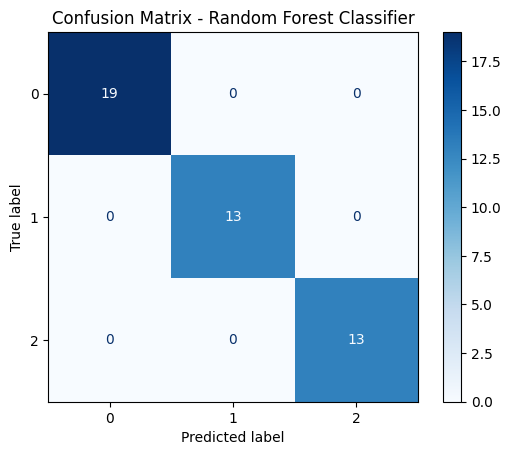

In [16]:
#15 Train a Random Forest Classifier and visualize the confusion matrix
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# 1. Load dataset
X, y = load_iris(return_X_y=True)

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Train a Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,     # number of trees
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# 4. Make predictions
y_pred = rf_model.predict(X_test)

# 5. Evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"🌳 Random Forest Accuracy: {acc * 100:.2f}%")

# 6. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)

# 7. Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


In [17]:
#16 Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load dataset
X, y = load_iris(return_X_y=True)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Define base models
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# 4. Define meta-model (final estimator)
final_estimator = LogisticRegression()

# 5. Create Stacking Classifier
stack_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    n_jobs=-1
)

# 6. Train the stacking model
stack_model.fit(X_train, y_train)

# 7. Make predictions
y_pred_stack = stack_model.predict(X_test)

# 8. Evaluate accuracy
stack_acc = accuracy_score(y_test, y_pred_stack)
print(f"🤖 Stacking Classifier Accuracy: {stack_acc * 100:.2f}%")

# 9. Compare with individual models
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
svm_model = SVC(probability=True, random_state=42).fit(X_train, y_train)
lr_model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

acc_dt = accuracy_score(y_test, dt_model.predict(X_test))
acc_svm = accuracy_score(y_test, svm_model.predict(X_test))
acc_lr = accuracy_score(y_test, lr_model.predict(X_test))

print(f"🌳 Decision Tree Accuracy: {acc_dt * 100:.2f}%")
print(f"⚙️  SVM Accuracy: {acc_svm * 100:.2f}%")
print(f"📈 Logistic Regression Accuracy: {acc_lr * 100:.2f}%")
print(f"🧩 Stacking Classifier Accuracy: {stack_acc * 100:.2f}%")


🤖 Stacking Classifier Accuracy: 100.00%
🌳 Decision Tree Accuracy: 100.00%
⚙️  SVM Accuracy: 100.00%
📈 Logistic Regression Accuracy: 100.00%
🧩 Stacking Classifier Accuracy: 100.00%


In [18]:
#17 Train a Random Forest Classifier and print the top 5 most important features
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# 1. Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100, random_state=42, n_jobs=-1
)
rf_model.fit(X_train, y_train)

# 4. Get feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 5. Print Top 5 Most Important Features
print("🏆 Top 5 Most Important Features in Random Forest Classifier:\n")
print(feature_importance_df.head(5).to_string(index=False))


🏆 Top 5 Most Important Features in Random Forest Classifier:

             Feature  Importance
 mean concave points    0.141934
worst concave points    0.127136
          worst area    0.118217
      mean concavity    0.080557
        worst radius    0.077975


In [19]:
#18 Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# 1. Load dataset
X, y = load_breast_cancer(return_X_y=True)

# 2. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Define base estimator (Decision Tree)
base_dt = DecisionTreeClassifier(random_state=42)

# 4. Create Bagging Classifier
bag_model = BaggingClassifier(
    estimator=base_dt,
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

# 5. Train model
bag_model.fit(X_train, y_train)

# 6. Make predictions
y_pred = bag_model.predict(X_test)

# 7. Evaluate using Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("🎯 Bagging Classifier Performance Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Optional detailed classification report
print("\n📊 Detailed Classification Report:")
print(classification_report(y_test, y_pred))


🎯 Bagging Classifier Performance Metrics:
Precision: 0.9633
Recall:    0.9722
F1-Score:  0.9677

📊 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [20]:
#19 Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
# Import necessary libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 1. Load dataset
X, y = load_diabetes(return_X_y=True)

# 2. Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Define base estimators
base_tree = DecisionTreeRegressor(random_state=42)
base_knn = KNeighborsRegressor()

# 4. Create Bagging Regressors
bag_tree = BaggingRegressor(estimator=base_tree, n_estimators=50, random_state=42, n_jobs=-1)
bag_knn = BaggingRegressor(estimator=base_knn, n_estimators=50, random_state=42, n_jobs=-1)

# 5. Train both models
bag_tree.fit(X_train, y_train)
bag_knn.fit(X_train, y_train)

# 6. Make predictions
y_pred_tree = bag_tree.predict(X_test)
y_pred_knn = bag_knn.predict(X_test)

# 7. Evaluate using MSE and R² Score
results = pd.DataFrame({
    "Model": ["Bagging (DecisionTree)", "Bagging (KNeighbors)"],
    "MSE": [
        mean_squared_error(y_test, y_pred_tree),
        mean_squared_error(y_test, y_pred_knn)
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_tree),
        r2_score(y_test, y_pred_knn)
    ]
})

# 8. Display results
print("📊 Bagging Regressor Performance Comparison:\n")
print(results.to_string(index=False))


📊 Bagging Regressor Performance Comparison:

                 Model         MSE  R2 Score
Bagging (DecisionTree) 2987.007359  0.446677
  Bagging (KNeighbors) 3140.186131  0.418302


In [21]:
#20 Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
# Import required libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 1. Load regression dataset
X, y = load_diabetes(return_X_y=True)

# 2. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Define base estimators
base_tree = DecisionTreeRegressor(random_state=42)
base_knn = KNeighborsRegressor(n_neighbors=5)

# 4. Create Bagging Regressors
bag_tree = BaggingRegressor(
    estimator=base_tree, n_estimators=50, random_state=42, n_jobs=-1
)

bag_knn = BaggingRegressor(
    estimator=base_knn, n_estimators=50, random_state=42, n_jobs=-1
)

# 5. Train both models
bag_tree.fit(X_train, y_train)
bag_knn.fit(X_train, y_train)

# 6. Make predictions
y_pred_tree = bag_tree.predict(X_test)
y_pred_knn = bag_knn.predict(X_test)

# 7. Evaluate with Mean Squared Error (MSE) and R² Score
results = pd.DataFrame({
    "Model": ["Bagging (DecisionTree)", "Bagging (KNeighbors)"],
    "MSE": [
        mean_squared_error(y_test, y_pred_tree),
        mean_squared_error(y_test, y_pred_knn)
    ],
    "R² Score": [
        r2_score(y_test, y_pred_tree),
        r2_score(y_test, y_pred_knn)
    ]
})

# 8. Display comparison
print("📊 Bagging Regressor Performance Comparison:\n")
print(results.to_string(index=False))


📊 Bagging Regressor Performance Comparison:

                 Model         MSE  R² Score
Bagging (DecisionTree) 2987.007359  0.446677
  Bagging (KNeighbors) 3140.186131  0.418302


🎯 Random Forest Classifier ROC-AUC Score: 0.9968


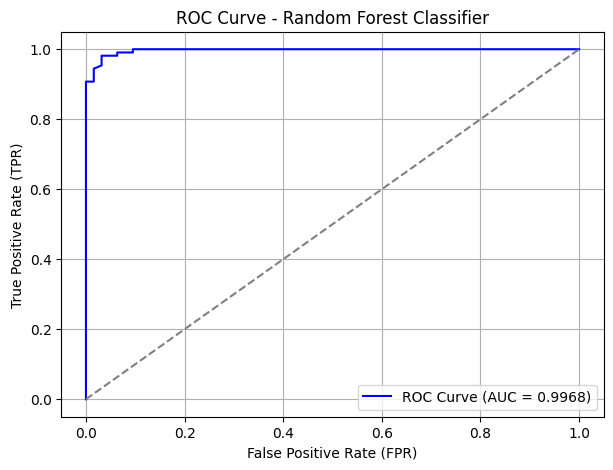

In [22]:
#21 Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Load dataset
X, y = load_breast_cancer(return_X_y=True)

# 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# 4. Predict probabilities for ROC-AUC calculation
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# 5. Compute ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"🎯 Random Forest Classifier ROC-AUC Score: {roc_auc:.4f}")

# 6. Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve - Random Forest Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
#22 Train a Bagging Classifier and evaluate its performance using cross-validation
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# 1. Load dataset
X, y = load_breast_cancer(return_X_y=True)

# 2. Define base estimator
base_tree = DecisionTreeClassifier(random_state=42)

# 3. Create Bagging Classifier
bag_model = BaggingClassifier(
    estimator=base_tree,
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

# 4. Define 5-Fold Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. Evaluate model using cross-validation
scores = cross_val_score(bag_model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

# 6. Print results
print("📊 Bagging Classifier Cross-Validation Results:")
print(f"Cross-validation accuracies: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


📊 Bagging Classifier Cross-Validation Results:
Cross-validation accuracies: [0.96491228 0.92982456 0.96491228 0.96491228 0.96460177]
Mean Accuracy: 0.9578
Standard Deviation: 0.0140


<Figure size 700x600 with 0 Axes>

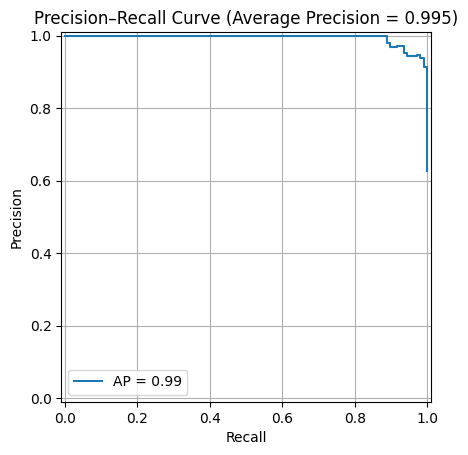

In [24]:
#23 Train a Random Forest Classifier and plot the Precision-Recall curv
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay

# 1. Load dataset
X, y = load_breast_cancer(return_X_y=True)

# 2. Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 4. Get prediction probabilities
y_scores = rf.predict_proba(X_test)[:, 1]

# 5. Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# 6. Plot Precision–Recall Curve
plt.figure(figsize=(7, 6))
disp = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=avg_precision)
disp.plot()
plt.title(f"Precision–Recall Curve (Average Precision = {avg_precision:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()


In [25]:
#24 Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Define base models
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# 4. Define meta-model (final estimator)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# 5. Create Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_model,
    passthrough=False
)

# 6. Train models
stacking_clf.fit(X_train, y_train)

# Train individual models for comparison
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# 7. Make predictions
y_pred_stack = stacking_clf.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)

# 8. Calculate accuracies
acc_stack = accuracy_score(y_test, y_pred_stack)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_lr = accuracy_score(y_test, y_pred_lr)

# 9. Print results
print("🔹 Model Accuracies:")
print(f" - Logistic Regression: {acc_lr:.4f}")
print(f" - Random Forest:       {acc_rf:.4f}")
print(f" - Stacking Classifier: {acc_stack:.4f}")


🔹 Model Accuracies:
 - Logistic Regression: 0.9708
 - Random Forest:       0.9708
 - Stacking Classifier: 0.9708


Bootstrap Sample Fraction vs MSE:
 - 50% samples → MSE: 0.2626
 - 70% samples → MSE: 0.2585
 - 90% samples → MSE: 0.2580
 - 100% samples → MSE: 0.2568


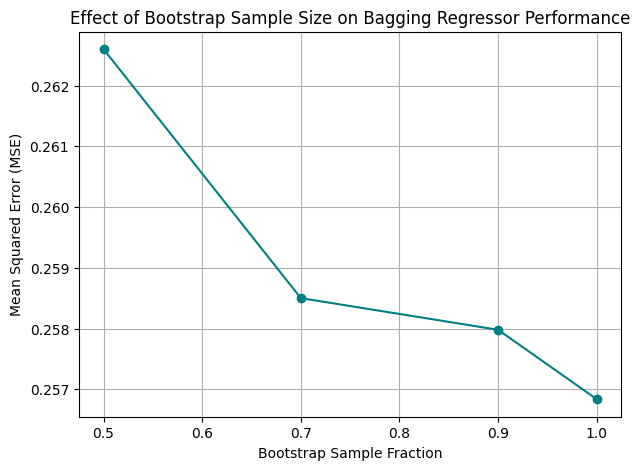

In [27]:
#25 Train a Bagging Regressor with different levels of bootstrap samples and compare performance.
# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Load dataset
X, y = fetch_california_housing(return_X_y=True)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Different bootstrap sample sizes (fraction of training data)
bootstrap_fractions = [0.5, 0.7, 0.9, 1.0]

# 4. Store results
results = []

# 5. Train Bagging Regressors with different bootstrap sample sizes
for frac in bootstrap_fractions:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42), # Corrected parameter name
        n_estimators=100,
        max_samples=frac,      # Fraction of samples drawn for each estimator
        bootstrap=True,
        random_state=42,
        n_jobs=-1 # Added for potentially faster execution
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append((frac, mse))

# 6. Print results
print("Bootstrap Sample Fraction vs MSE:")
for frac, mse in results:
    print(f" - {frac*100:.0f}% samples → MSE: {mse:.4f}")

# 7. Optional: Plot results
fractions, mses = zip(*results)
plt.figure(figsize=(7, 5))
plt.plot(fractions, mses, marker='o', linestyle='-', color='teal')
plt.title("Effect of Bootstrap Sample Size on Bagging Regressor Performance")
plt.xlabel("Bootstrap Sample Fraction")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()